In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:

# Paths
X_train_path = r"D:\projects\BFSI_Predictive_modelling\bfsi_v4\data\processed\train_data\train_features.csv"
y_train_path = r"D:\projects\BFSI_Predictive_modelling\bfsi_v4\data\processed\train_data\train_labels.csv"
X_test_path  = r"D:\projects\BFSI_Predictive_modelling\bfsi_v4\data\processed\test_data\test_features.csv"
y_test_path  = r"D:\projects\BFSI_Predictive_modelling\bfsi_v4\data\processed\test_data\test_labels.csv"

# Load CSVs
X_train = pd.read_csv(X_train_path)
y_train = pd.read_csv(y_train_path)

X_test  = pd.read_csv(X_test_path)
y_test  = pd.read_csv(y_test_path)

# Merge feature + label datasets
train_df = X_train.copy()
train_df['fraud_label'] = y_train.values

test_df = X_test.copy()
test_df['fraud_label'] = y_test.values

# Check outputs
print("Train Data:")
print(train_df.head())

print("\nTest Data:")
print(test_df.head())
df=train_df

Train Data:
  customer_id  kyc_verified  account_age_days  transaction_amount  \
0    CUST_566             1              2348                7507   
1    CUST_386             0              1861              228746   
2    CUST_187             1              1325               10559   
3    CUST_760             1              1564               61178   
4    CUST_554             1              1769               10300   

   channel_encoded  hour_of_day  day_of_week  is_night_txn  \
0                3           13            5             0   
1                1           17            4             0   
2                3            3            1             1   
3                1            4            5             1   
4                0           14            5             0   

   is_high_amount_transaction  high_amount_night_txn  \
0                           0                      0   
1                           1                      0   
2                           0   

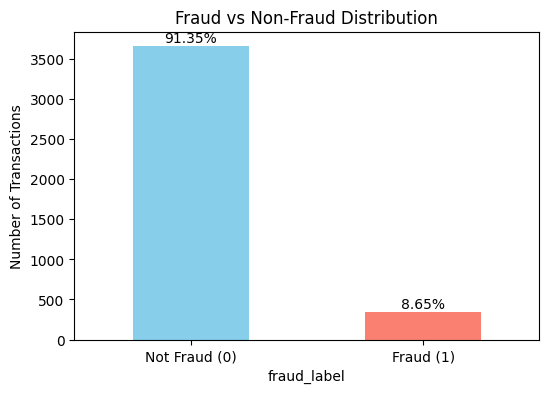

In [7]:
fraud_counts = df['fraud_label'].value_counts(normalize=False)
fraud_percent = df['fraud_label'].value_counts(normalize=True) * 100

# Plot fraud distribution
plt.figure(figsize=(6,4))
fraud_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks([0,1], ['Not Fraud (0)', 'Fraud (1)'], rotation=0)
plt.ylabel("Number of Transactions")
plt.title("Fraud vs Non-Fraud Distribution")

# Annotate percentages
for i, count in enumerate(fraud_counts):
    plt.text(i, count+50, f"{fraud_percent[i]:.2f}%", ha='center', fontsize=10)
plt.show()

C:\Users\piyus\AppData\Local\Temp\ipykernel_3544\2080072380.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fraud_label', y='transaction_amount', data=df, palette=['skyblue','salmon'])


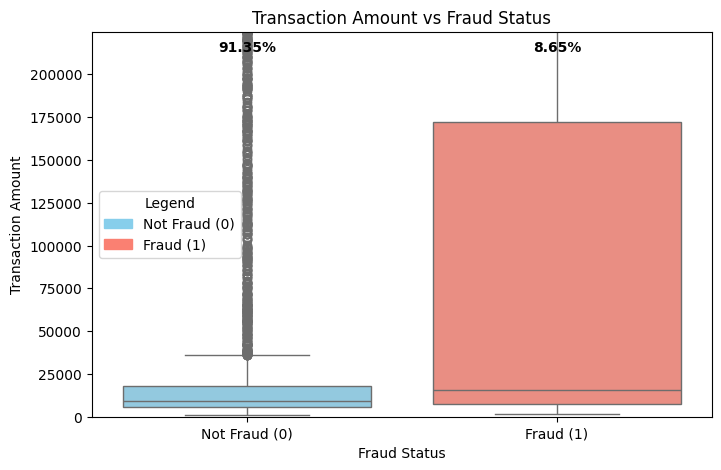

In [8]:
import matplotlib.patches as mpatches
# Calculate percentages
fraud_percentages = df['fraud_label'].value_counts(normalize=True) * 100

# Plot transaction amount distribution by fraud status
plt.figure(figsize=(8,5))
sns.boxplot(x='fraud_label', y='transaction_amount', data=df, palette=['skyblue','salmon'])
plt.xticks([0,1], ['Not Fraud (0)', 'Fraud (1)'])
plt.title("Transaction Amount vs Fraud Status")
plt.ylabel("Transaction Amount")
plt.xlabel("Fraud Status")

# Limit y-axis to remove extreme outliers (show up to 95th percentile)
plt.ylim(0, df['transaction_amount'].quantile(0.95))

# Add legend
not_fraud_patch = mpatches.Patch(color='skyblue', label='Not Fraud (0)')
fraud_patch = mpatches.Patch(color='salmon', label='Fraud (1)')
plt.legend(handles=[not_fraud_patch, fraud_patch], title="Legend")

# Annotate percentages above each box
for i, pct in fraud_percentages.items():
    plt.text(i, df['transaction_amount'].quantile(0.95)*0.95, f"{pct:.2f}%",
             ha='center', fontsize=10, fontweight='bold', color='black')
plt.show()

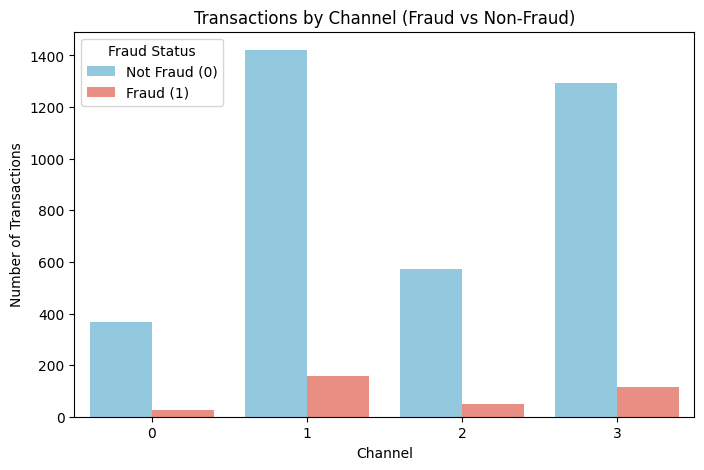

In [10]:
# --- 1. Countplot: Fraud vs Non-Fraud by Channel with Percentages ---
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='channel_encoded', hue='fraud_label', palette=['skyblue','salmon'])
plt.title("Transactions by Channel (Fraud vs Non-Fraud)")
plt.xlabel("Channel")
plt.ylabel("Number of Transactions")
plt.legend(title="Fraud Status", labels=['Not Fraud (0)', 'Fraud (1)'])

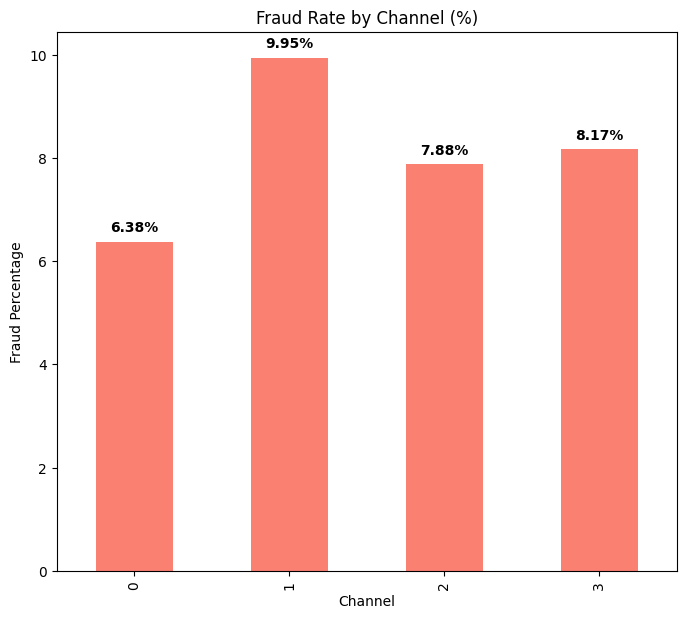

In [12]:
fraud_rate_by_channel = df.groupby('channel_encoded')['fraud_label'].mean() * 100

plt.figure(figsize=(8,7))
fraud_rate_by_channel.plot(kind='bar', color='salmon')
plt.title("Fraud Rate by Channel (%)")
plt.ylabel("Fraud Percentage")
plt.xlabel("Channel")

for i, val in enumerate(fraud_rate_by_channel):
    plt.text(i, val+0.2, f"{val:.2f}%", ha='center', fontsize=10, fontweight='bold')

plt.show()

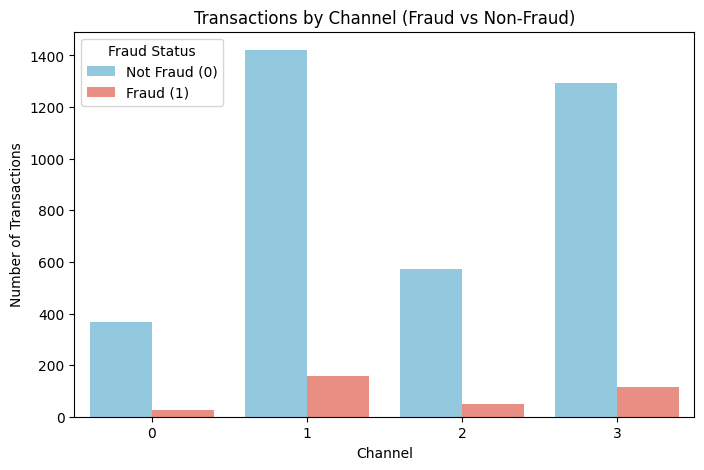

In [13]:
# --- 1. Countplot: Fraud vs Non-Fraud by Channel ---
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='channel_encoded', hue='fraud_label', palette=['skyblue','salmon'])
plt.title("Transactions by Channel (Fraud vs Non-Fraud)")
plt.xlabel("Channel")
plt.ylabel("Number of Transactions")
plt.legend(title="Fraud Status", labels=['Not Fraud (0)', 'Fraud (1)'])
plt.show()

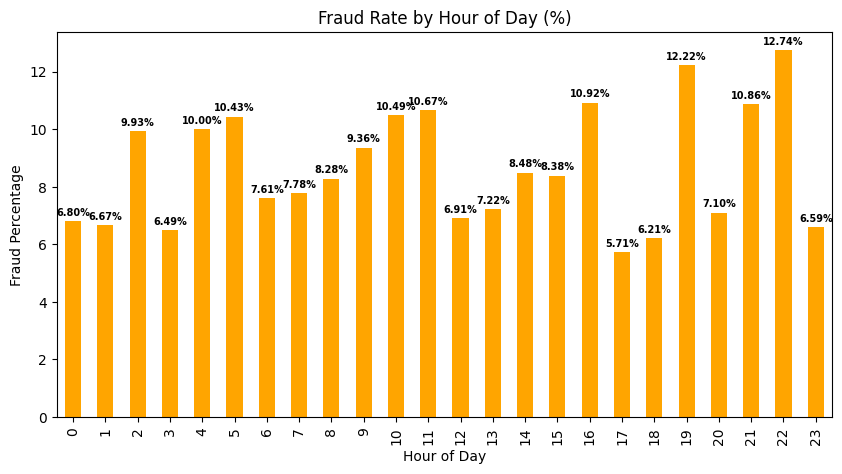

In [15]:
plt.figure(figsize=(10,5))
fraud_rate_by_hour = df.groupby('hour_of_day')['fraud_label'].mean() * 100
fraud_rate_by_hour.plot(kind='bar', color='orange')
plt.title("Fraud Rate by Hour of Day (%)")
plt.xlabel("Hour of Day")
plt.ylabel("Fraud Percentage")

# Annotate percentages
for i, val in enumerate(fraud_rate_by_hour):
    plt.text(i, val+0.2, f"{val:.2f}%", ha='center', fontsize=7, fontweight='bold')

plt.show()


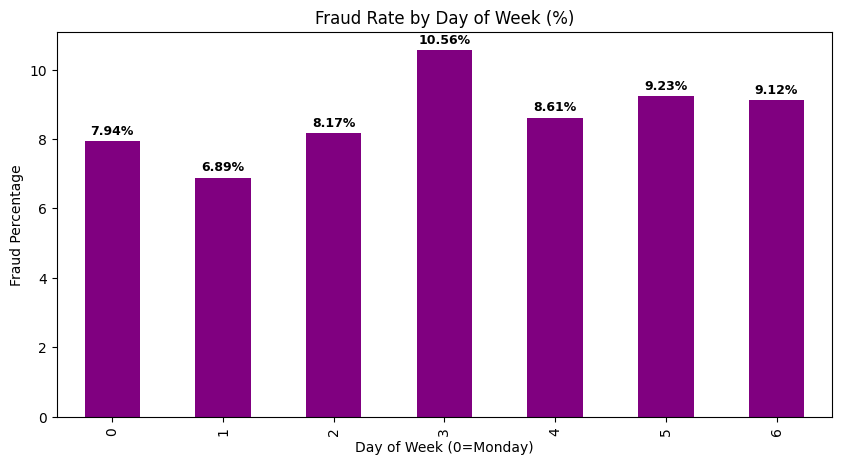

In [19]:
plt.figure(figsize=(10,5))
fraud_rate_by_weekday = df.groupby('day_of_week')['fraud_label'].mean() * 100
fraud_rate_by_weekday.plot(kind='bar', color='purple')
plt.title("Fraud Rate by Day of Week (%)")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Fraud Percentage")

# Annotate percentages
for i, val in enumerate(fraud_rate_by_weekday):
    plt.text(i, val+0.2, f"{val:.2f}%", ha='center', fontsize=9, fontweight='bold')

plt.show()


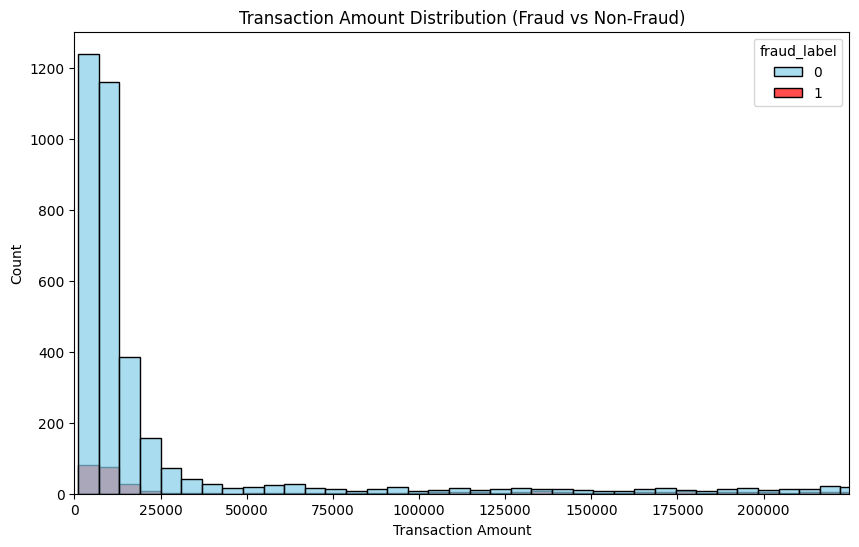

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='transaction_amount', hue='fraud_label', bins=50,
             palette=['skyblue','red'], kde=False, alpha=0.7)
plt.xlim(0, df['transaction_amount'].quantile(0.95))  # limit outliers
plt.title("Transaction Amount Distribution (Fraud vs Non-Fraud)")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.show()


C:\Users\piyus\AppData\Local\Temp\ipykernel_3544\2287085496.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='kyc_verified', y='fraud_label', estimator=lambda x: sum(x)/len(x)*100,


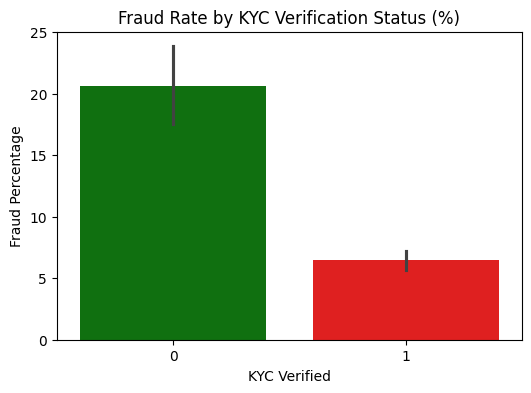

In [22]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='kyc_verified', y='fraud_label', estimator=lambda x: sum(x)/len(x)*100,
            palette=['green','red'])
plt.title("Fraud Rate by KYC Verification Status (%)")
plt.ylabel("Fraud Percentage")
plt.xlabel("KYC Verified")
plt.show()


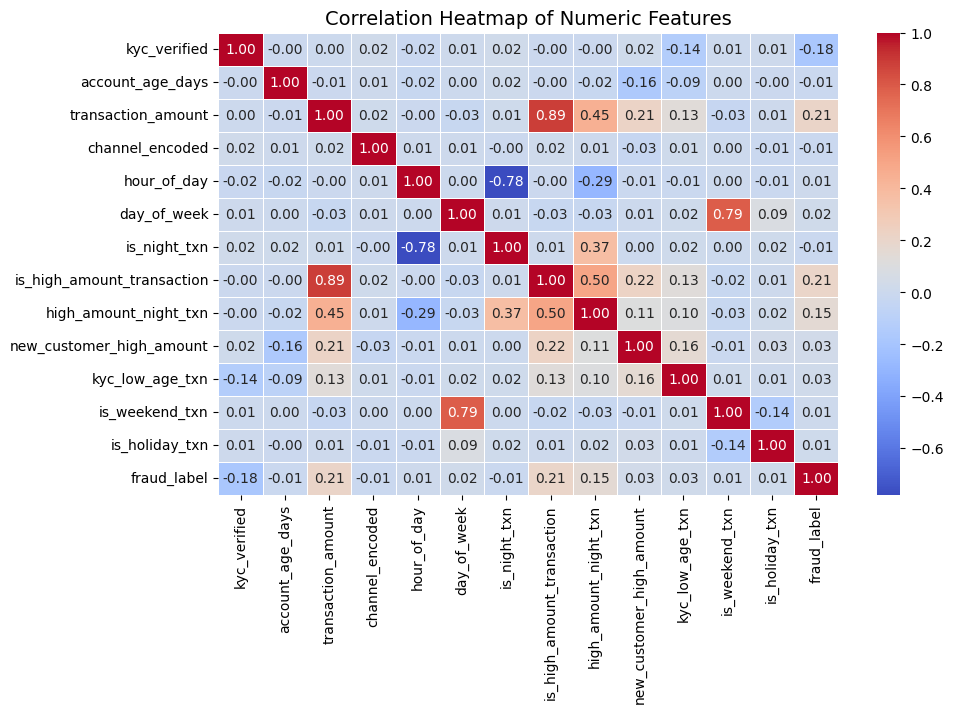

In [23]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64','float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

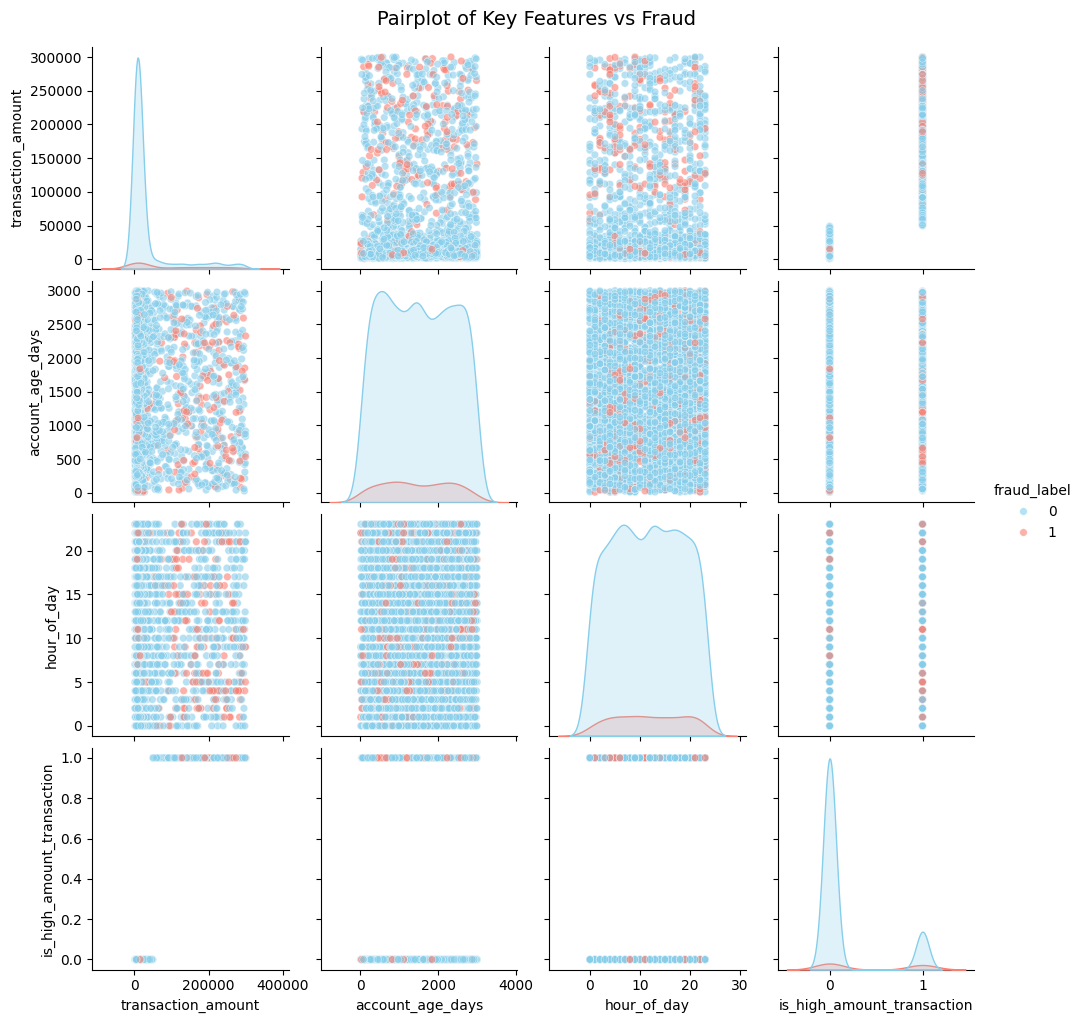

In [27]:

# Select important features
pairplot_features = ["transaction_amount", "account_age_days", "hour_of_day", "is_high_amount_transaction", "fraud_label"]

# Pairplot
sns.pairplot(df[pairplot_features], hue="fraud_label",
             palette={0: "skyblue", 1: "salmon"}, diag_kind="kde",
             plot_kws={"alpha":0.6, "s":30})
plt.suptitle("Pairplot of Key Features vs Fraud", y=1.02, fontsize=14)
plt.show()

